# Dry Beans Classification

# Exploratory Data Analysis (Dry_Bean_Dataset)

#### Agenda
- Loading the dataset
- Data wrangling for missing variables. 
- Data transformation. 
- Data visualization

### All about Data 

- ID: An ID for this instance
- Area (A): The area of a bean zone and the number of pixels within its boundaries.
- Perimeter (P): Bean circumference is defined as the length of its border.
- MajorAxisLength (L): The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio (K): Defines the relationship between L and l.
- Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
- ConvexArea (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter (Ed): The diameter of a circle having the same area as a bean seed area.
- Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
- Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness (R): Calculated with the following formula: (4* pi * A)/(P^2)
- Compactness (CO): Measures the roundness of an object: Ed/L
- ShapeFactor1 (SF1): L/d
- ShapeFactor2 (SF2): l/d
- ShapeFactor3 (SF3): 4A/(L^2 * pi)
- ShapeFactor4 (SF4): 4A/(L* l * pi)
- y: The class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

## Install required packages

In [ ]:
# pip install imbalanced-learn
# pip install featurewiz

## Importing libraries

In [10]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
# from plotnine import *
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour
from sklearn.utils import class_weight
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, plot_confusion_matrix, classification_report,f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score,RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from lightgbm import *
from sklearn.neural_network import MLPClassifier
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [11]:
!pip install catboost

## Reading the dataset

In [12]:
df= pd.read_csv("Dry_Bean_Dataset.csv")

In [13]:
df

Bean ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  \
0            1  28395    610.291       208.178117       173.888747   
1            2  28734    638.018       200.524796       182.734419   
2            3  29380    624.110       212.826130       175.931143   
3            4  30008    645.884       210.557999       182.516516   
4            5  30140    620.134       201.847882       190.279279   
...        ...    ...        ...              ...              ...   
13606    13607  42097    759.696       288.721612       185.944705   
13607    13608  42101    757.499       281.576392       190.713136   
13608    13609  42139    759.321       281.539928       191.187979   
13609    13610  42147    763.779       283.382636       190.275731   
13610    13611  42159    772.237       295.142741       182.204716   

       AspectRation  Eccentricity  ConvexArea  EquivDiameter    Extent  \
0          1.197191      0.549812       28715     190.141097  0.763923   
1          1.097356      0.411785       29172     191.272751  0.783968   
2          1.209713      0.562727       29690     193.410904  0.778113   
3          1.153638      0.498616       30724     195.467062  0.782681   
4          1.060798      0.333680       30417     195.896503  0.773098   
...             ...           ...         ...            ...       ...   
13606      1.552728      0.765002       42508     231.515799  0.714574   
13607      1.476439      0.735702       42494     231.526798  0.799943   
13608      1.472582      0.734065       42569     231.631261  0.729932   
13609      1.489326      0.741055       42667     231.653247  0.705389   
13610      1.619841      0.786693       42600     231.686223  0.788962   

       Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  \
0      0.988856   0.958027     0.913358      0.007332      0.003147   
1      0.984986   0.887034     0.953861      0.006979      0.003564   
2      0.989559   0.947849     0.908774      0.007244      0.003048   
3      0.976696   0.903936          NaN      0.007017      0.003215   
4      0.990893   0.984877     0.970516      0.006697      0.003665   
...         ...        ...          ...           ...           ...   
13606  0.990331   0.916603     0.801865      0.006858      0.001749   
13607  0.990752   0.922015     0.822252      0.006688      0.001886   
13608  0.989899   0.918424     0.822730      0.006681      0.001888   
13609  0.987813   0.907906     0.817457      0.006724      0.001852   
13610  0.989648   0.888380     0.784997      0.007001      0.001640   

       ShapeFactor3  ShapeFactor4     Class  
0          0.834222      0.998724     SEKER  
1          0.909851      0.998430     SEKER  
2          0.825871      0.999066     SEKER  
3          0.861794      0.994199     SEKER  
4          0.941900      0.999166     SEKER  
...             ...           ...       ...  
13606      0.642988      0.998385  DERMASON  
13607      0.676099      0.998219  DERMASON  
13608      0.676884      0.996767  DERMASON  
13609      0.668237      0.995222  DERMASON  
13610      0.616221      0.998180  DERMASON  

[13611 rows x 18 columns]

- There are 10834 rows and and a total of 16 features.

In [14]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

- There are 7 unique target classes 

### Get Data Summary

In [15]:
df.describe()

Bean ID           Area     Perimeter  MajorAxisLength  \
count  13611.000000   13611.000000  13611.000000     13609.000000   
mean    6806.000000   53048.284549    855.283459       320.155372   
std     3929.301592   29324.095717    214.289696        85.693199   
min        1.000000   20420.000000    524.736000       183.601165   
25%     3403.500000   36328.000000    703.523500       253.319280   
50%     6806.000000   44652.000000    794.941000       296.899313   
75%    10208.500000   61332.000000    977.213000       376.497678   
max    13611.000000  254616.000000   1985.370000       738.860154   

       MinorAxisLength  AspectRation  Eccentricity     ConvexArea  \
count     13608.000000  13610.000000  13609.000000   13611.000000   
mean        202.273996      1.583268      0.750930   53768.200206   
std          44.974478      0.246669      0.091962   29774.915817   
min         122.512653      1.024868      0.218951   20684.000000   
25%         175.840519      1.432352      0.715953   36714.500000   
50%         192.443880      1.551132      0.764446   45178.000000   
75%         217.036082      1.707118      0.810471   62294.000000   
max         460.198497      2.430306      0.911423  263261.000000   

       EquivDiameter        Extent      Solidity     roundness   Compactness  \
count   13611.000000  13611.000000  13608.000000  13611.000000  13607.000000   
mean      253.064220      0.749733      0.987142      0.873282      0.799830   
std        59.177120      0.049086      0.004661      0.059520      0.061691   
min       161.243764      0.555315      0.919246      0.489618      0.640577   
25%       215.068003      0.718634      0.985670      0.832096      0.762444   
50%       238.438026      0.759859      0.988283      0.883157      0.801227   
75%       279.446467      0.786851      0.990013      0.916869      0.834234   
max       569.374358      0.866195      0.994677      0.990685      0.987303   

       ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
count  13607.000000  13609.000000  13611.000000  13611.000000  
mean       0.006564      0.001716      0.643590      0.995063  
std        0.001128      0.000596      0.098996      0.004366  
min        0.002778      0.000564      0.410339      0.947687  
25%        0.005900      0.001153      0.581359      0.993703  
50%        0.006645      0.001694      0.642044      0.996386  
75%        0.007272      0.002170      0.696006      0.997883  
max        0.010451      0.003665      0.974767      0.999733

In [16]:
df.describe(percentiles=[.25, .5, .75, 0.995]).T

count          mean           std           min  \
Bean ID          13611.0   6806.000000   3929.301592      1.000000   
Area             13611.0  53048.284549  29324.095717  20420.000000   
Perimeter        13611.0    855.283459    214.289696    524.736000   
MajorAxisLength  13609.0    320.155372     85.693199    183.601165   
MinorAxisLength  13608.0    202.273996     44.974478    122.512653   
AspectRation     13610.0      1.583268      0.246669      1.024868   
Eccentricity     13609.0      0.750930      0.091962      0.218951   
ConvexArea       13611.0  53768.200206  29774.915817  20684.000000   
EquivDiameter    13611.0    253.064220     59.177120    161.243764   
Extent           13611.0      0.749733      0.049086      0.555315   
Solidity         13608.0      0.987142      0.004661      0.919246   
roundness        13611.0      0.873282      0.059520      0.489618   
Compactness      13607.0      0.799830      0.061691      0.640577   
ShapeFactor1     13607.0      0.006564      0.001128      0.002778   
ShapeFactor2     13609.0      0.001716      0.000596      0.000564   
ShapeFactor3     13611.0      0.643590      0.098996      0.410339   
ShapeFactor4     13611.0      0.995063      0.004366      0.947687   

                          25%           50%           75%          99.5%  \
Bean ID           3403.500000   6806.000000  10208.500000   13542.950000   
Area             36328.000000  44652.000000  61332.000000  200711.400000   
Perimeter          703.523500    794.941000    977.213000    1716.395500   
MajorAxisLength    253.319280    296.899313    376.497678     651.185644   
MinorAxisLength    175.840519    192.443880    217.036082     401.346243   
AspectRation         1.432352      1.551132      1.707118       2.247552   
Eccentricity         0.715953      0.764446      0.810471       0.895566   
ConvexArea       36714.500000  45178.000000  62294.000000  203371.050000   
EquivDiameter      215.068003    238.438026    279.446467     505.523186   
Extent               0.718634      0.759859      0.786851       0.831485   
Solidity             0.985670      0.988283      0.990013       0.993305   
roundness            0.832096      0.883157      0.916869       0.976516   
Compactness          0.762444      0.801227      0.834234       0.945362   
ShapeFactor1         0.005900      0.006645      0.007272       0.009023   
ShapeFactor2         0.001153      0.001694      0.002170       0.003153   
ShapeFactor3         0.581359      0.642044      0.696006       0.893705   
ShapeFactor4         0.993703      0.996386      0.997883       0.999460   

                           max  
Bean ID           13611.000000  
Area             254616.000000  
Perimeter          1985.370000  
MajorAxisLength     738.860154  
MinorAxisLength     460.198497  
AspectRation          2.430306  
Eccentricity          0.911423  
ConvexArea       263261.000000  
EquivDiameter       569.374358  
Extent                0.866195  
Solidity              0.994677  
roundness             0.990685  
Compactness           0.987303  
ShapeFactor1          0.010451  
ShapeFactor2          0.003665  
ShapeFactor3          0.974767  
ShapeFactor4          0.999733

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bean ID          13611 non-null  int64  
 1   Area             13611 non-null  int64  
 2   Perimeter        13611 non-null  float64
 3   MajorAxisLength  13609 non-null  float64
 4   MinorAxisLength  13608 non-null  float64
 5   AspectRation     13610 non-null  float64
 6   Eccentricity     13609 non-null  float64
 7   ConvexArea       13611 non-null  int64  
 8   EquivDiameter    13611 non-null  float64
 9   Extent           13611 non-null  float64
 10  Solidity         13608 non-null  float64
 11  roundness        13611 non-null  float64
 12  Compactness      13607 non-null  float64
 13  ShapeFactor1     13607 non-null  float64
 14  ShapeFactor2     13609 non-null  float64
 15  ShapeFactor3     13611 non-null  float64
 16  ShapeFactor4     13611 non-null  float64
 17  Class       

- No missing values in the training dataset but we have to take into consideration if any missing data may appear in the test set.

### Checking for duplicates

In [18]:
df.duplicated(subset=None, keep='first').sum()

0

- No duplicate records

<AxesSubplot:xlabel='Class', ylabel='count'>

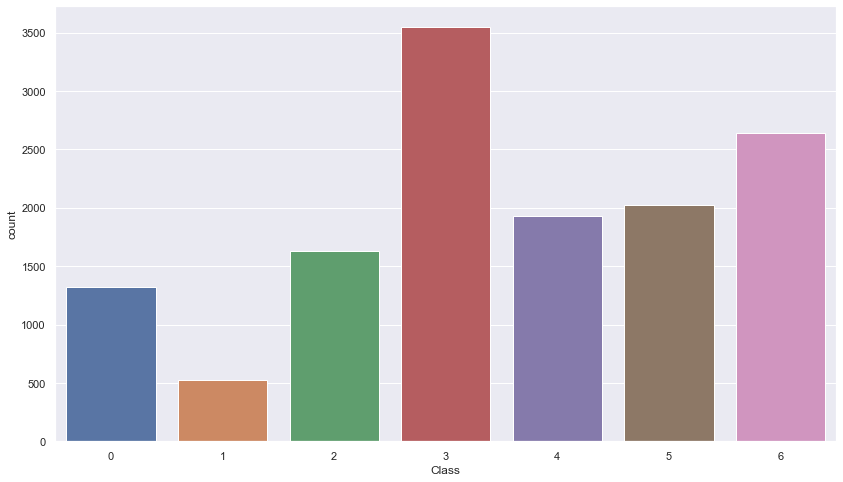

In [115]:
import seaborn as sns

sns.set(rc={'figure.figsize': (14, 8)})
sns.countplot(df['Class'])

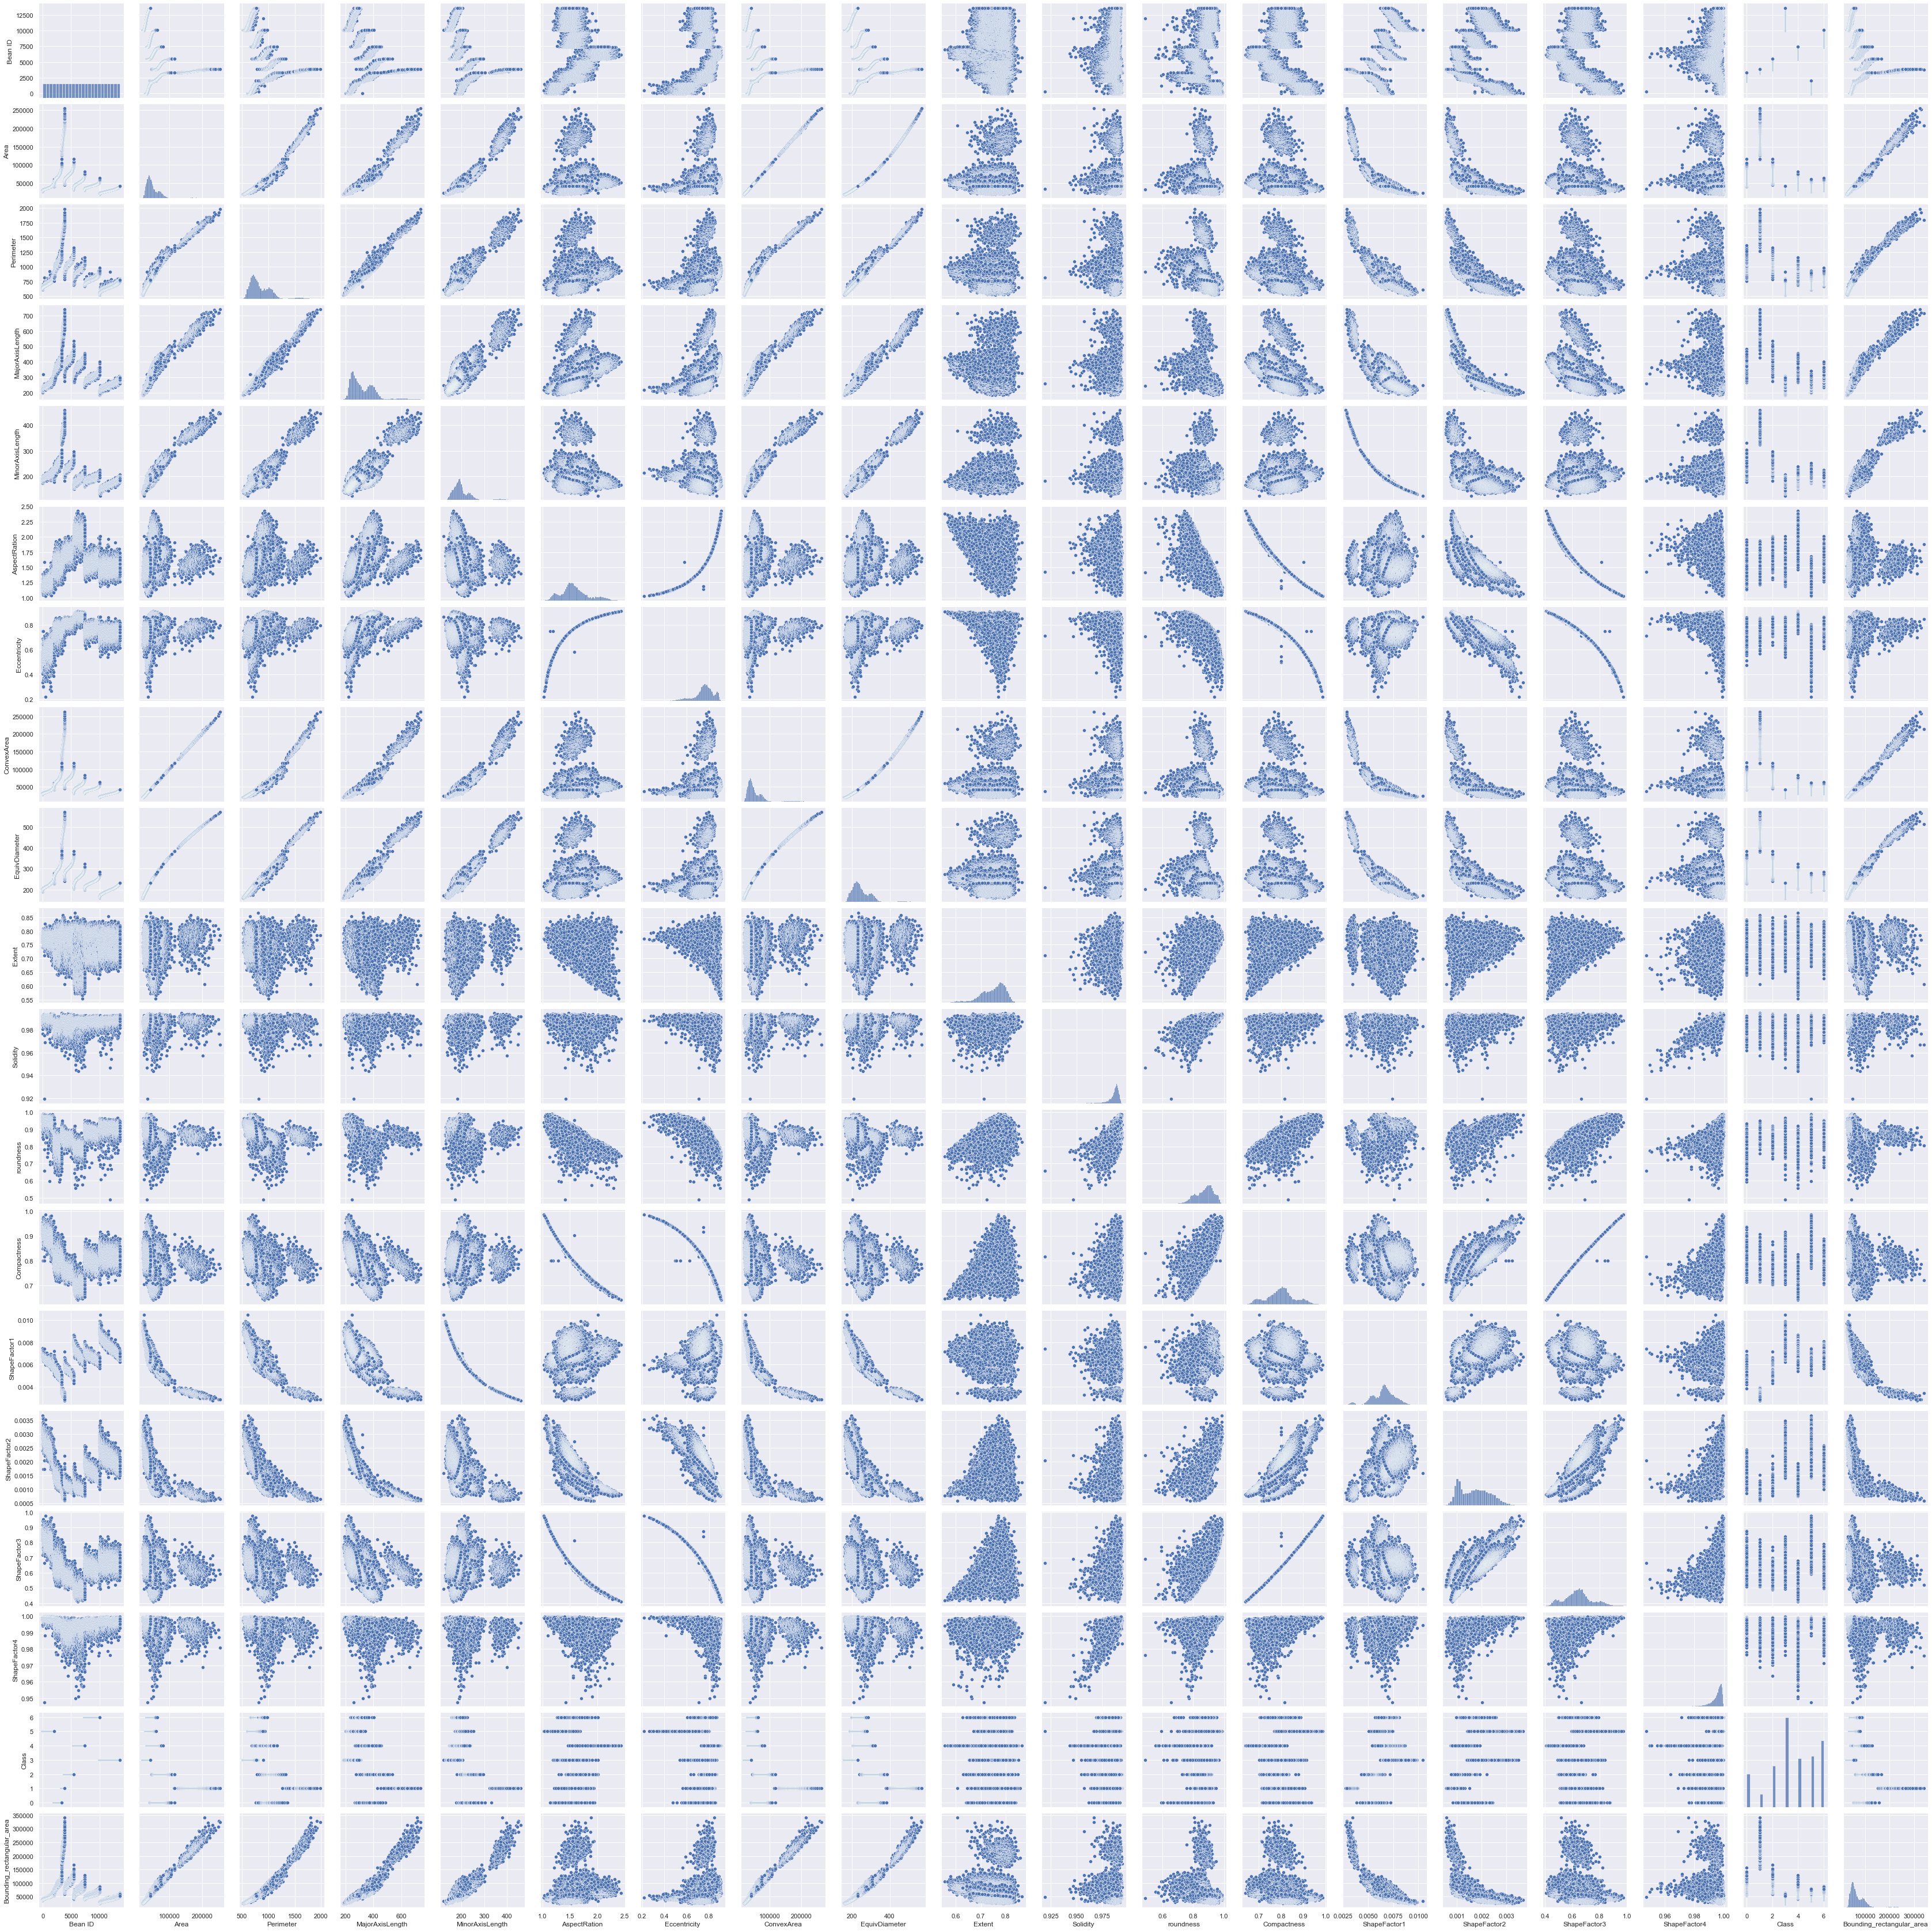

In [116]:
sns.pairplot(df)

<AxesSubplot:>

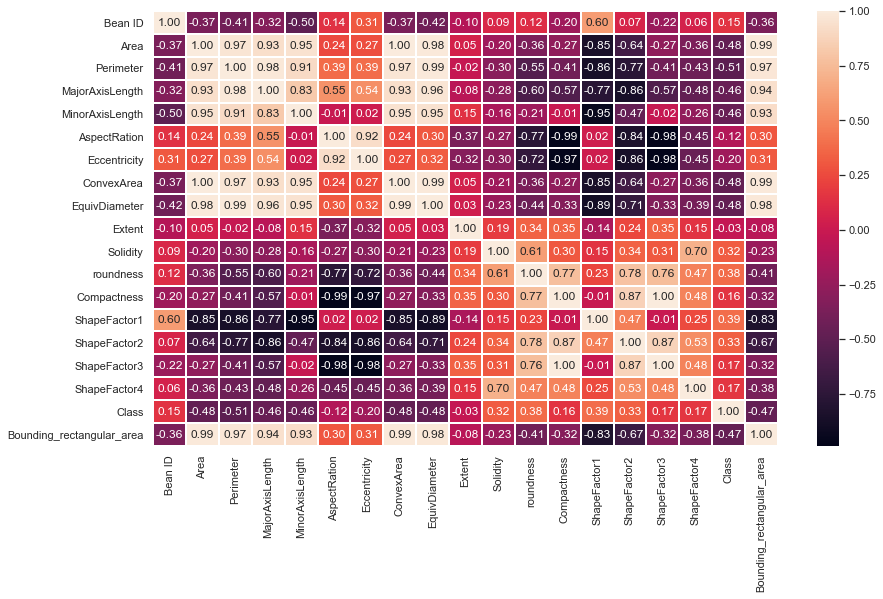

In [117]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

## Checking for Null Values

In [41]:
df.isnull().sum()

Bean ID                      0
Area                         0
Perimeter                    0
MajorAxisLength              2
MinorAxisLength              3
AspectRation                 1
Eccentricity                 2
ConvexArea                   0
EquivDiameter                0
Extent                       0
Solidity                     3
roundness                    0
Compactness                  4
ShapeFactor1                 4
ShapeFactor2                 2
ShapeFactor3                 0
ShapeFactor4                 0
Class                        0
Bounding_rectangular_area    0
dtype: int64

In [45]:
###Fill null values
nulldata = df.columns[df.isnull().any()].tolist()
for i in nulldata:
    df[i].fillna(df[i].mean(), inplace=True)
df

Bean ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  \
0            1  28395    610.291       208.178117       173.888747   
1            2  28734    638.018       200.524796       182.734419   
2            3  29380    624.110       212.826130       175.931143   
3            4  30008    645.884       210.557999       182.516516   
4            5  30140    620.134       201.847882       190.279279   
...        ...    ...        ...              ...              ...   
13606    13607  42097    759.696       288.721612       185.944705   
13607    13608  42101    757.499       281.576392       190.713136   
13608    13609  42139    759.321       281.539928       191.187979   
13609    13610  42147    763.779       283.382636       190.275731   
13610    13611  42159    772.237       295.142741       182.204716   

       AspectRation  Eccentricity  ConvexArea  EquivDiameter    Extent  \
0          1.197191      0.549812       28715     190.141097  0.763923   
1          1.097356      0.411785       29172     191.272751  0.783968   
2          1.209713      0.562727       29690     193.410904  0.778113   
3          1.153638      0.498616       30724     195.467062  0.782681   
4          1.060798      0.333680       30417     195.896503  0.773098   
...             ...           ...         ...            ...       ...   
13606      1.552728      0.765002       42508     231.515799  0.714574   
13607      1.476439      0.735702       42494     231.526798  0.799943   
13608      1.472582      0.734065       42569     231.631261  0.729932   
13609      1.489326      0.741055       42667     231.653247  0.705389   
13610      1.619841      0.786693       42600     231.686223  0.788962   

       Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  \
0      0.988856   0.958027     0.913358      0.007332      0.003147   
1      0.984986   0.887034     0.953861      0.006979      0.003564   
2      0.989559   0.947849     0.908774      0.007244      0.003048   
3      0.976696   0.903936     0.799830      0.007017      0.003215   
4      0.990893   0.984877     0.970516      0.006697      0.003665   
...         ...        ...          ...           ...           ...   
13606  0.990331   0.916603     0.801865      0.006858      0.001749   
13607  0.990752   0.922015     0.822252      0.006688      0.001886   
13608  0.989899   0.918424     0.822730      0.006681      0.001888   
13609  0.987813   0.907906     0.817457      0.006724      0.001852   
13610  0.989648   0.888380     0.784997      0.007001      0.001640   

       ShapeFactor3  ShapeFactor4  Class  Bounding_rectangular_area  
0          0.834222      0.998724      5               37169.999998  
1          0.909851      0.998430      5               36652.000000  
2          0.825871      0.999066      5               37758.000001  
3          0.861794      0.994199      5               38340.000001  
4          0.941900      0.999166      5               38986.000000  
...             ...           ...    ...                        ...  
13606      0.642988      0.998385      3               58911.999999  
13607      0.676099      0.998219      3               52629.999999  
13608      0.676884      0.996767      3               57730.000003  
13609      0.668237      0.995222      3               59750.000003  
13610      0.616221      0.998180      3               53436.000000  

[13611 rows x 19 columns]

In [46]:
df.isnull().sum()

Bean ID                      0
Area                         0
Perimeter                    0
MajorAxisLength              0
MinorAxisLength              0
AspectRation                 0
Eccentricity                 0
ConvexArea                   0
EquivDiameter                0
Extent                       0
Solidity                     0
roundness                    0
Compactness                  0
ShapeFactor1                 0
ShapeFactor2                 0
ShapeFactor3                 0
ShapeFactor4                 0
Class                        0
Bounding_rectangular_area    0
dtype: int64

**1- Count and distribution of all beans categories:**

In [47]:
df['Class'].value_counts()

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64


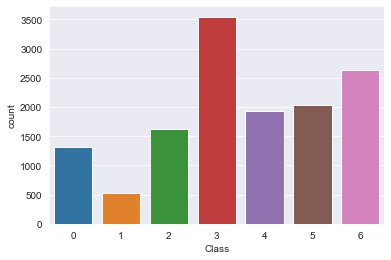

In [48]:
print(df['Class'].value_counts())
_ = sns.countplot(x='Class', data=df)

- We can notice that there is a slight imbalance in the data we need to handle.

**2- Distribution of numerical features:**

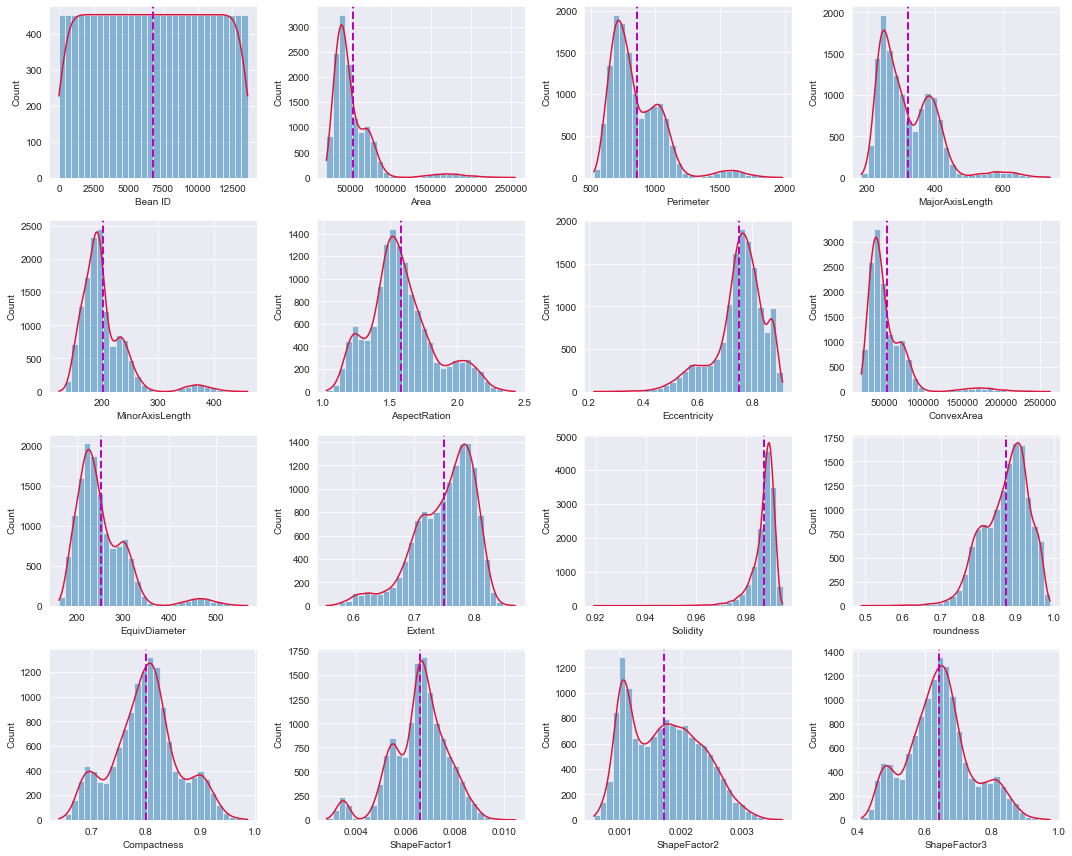

In [49]:
Numeric_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

- Some distributions have long tails and most are **bi-modal** which means that some bean classes should be quite distinct from others. 

**3- Boxplot of numerical features for each type of bean:**

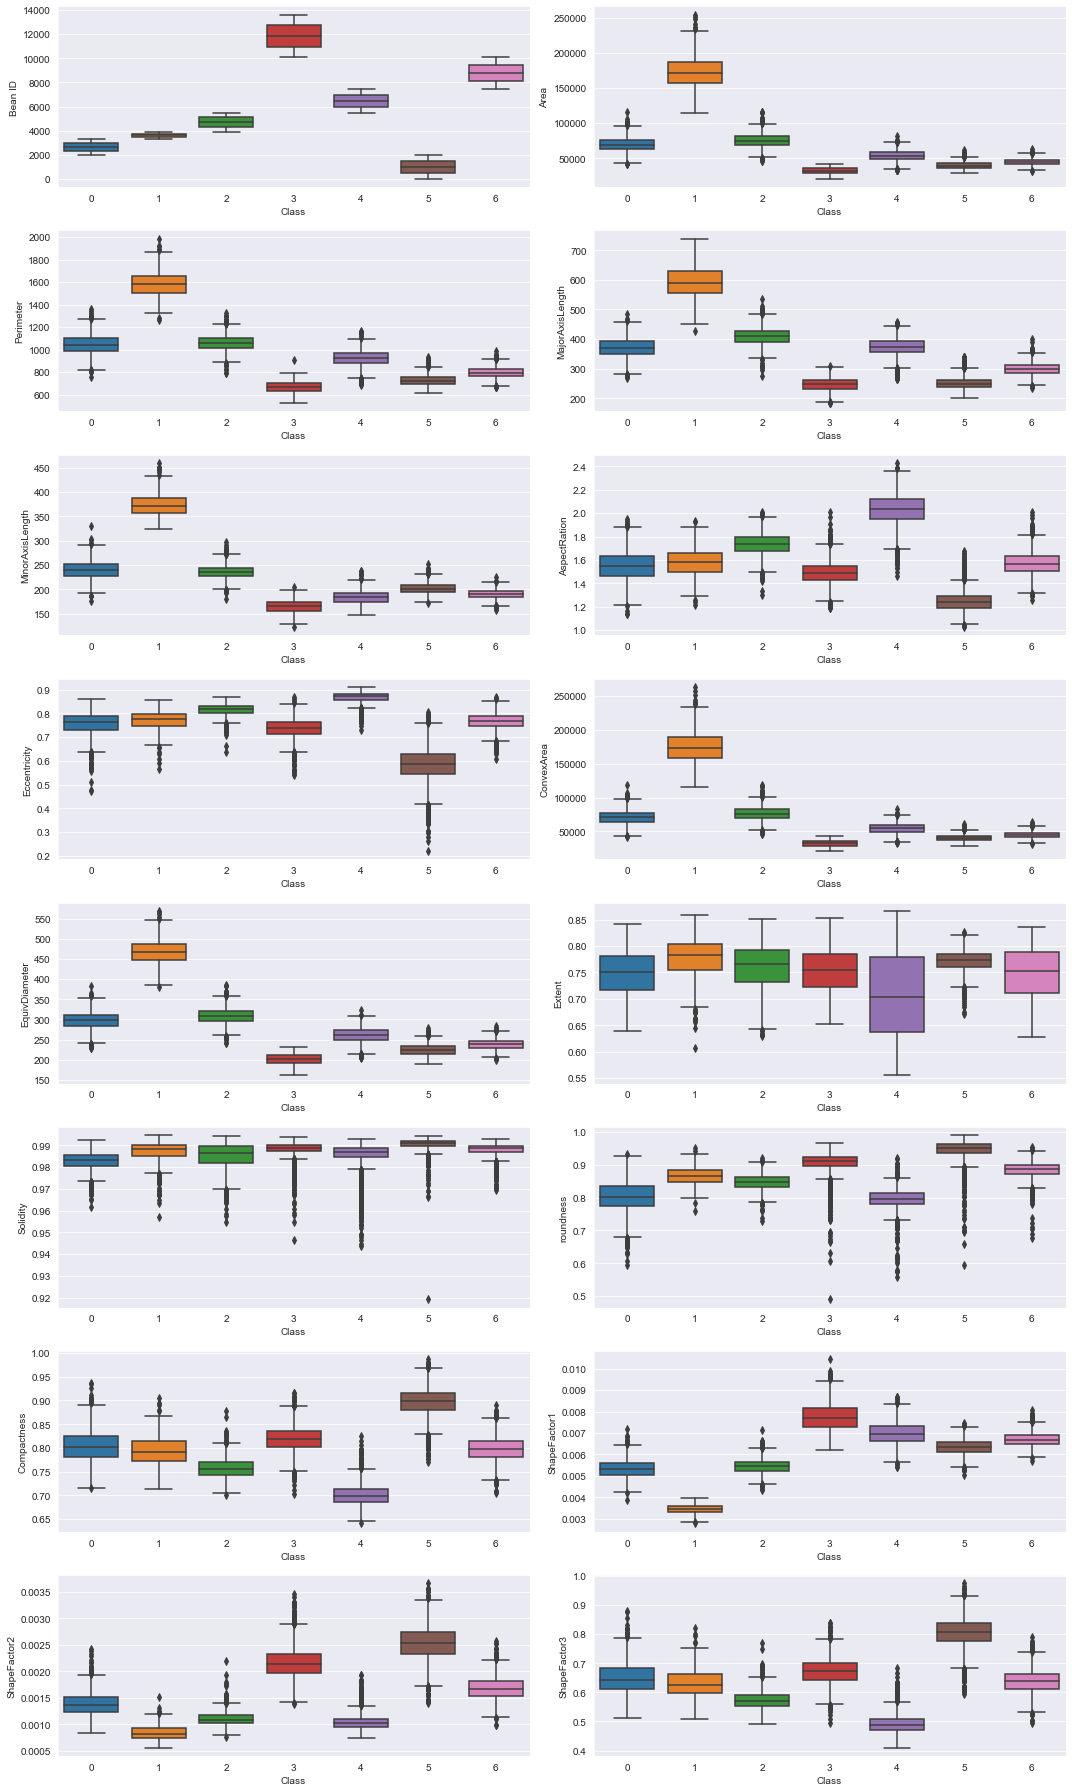

In [50]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot)
plt.tight_layout()

- We can notice that the "Bombay" & "Horoz" classes are distinct from other classes.

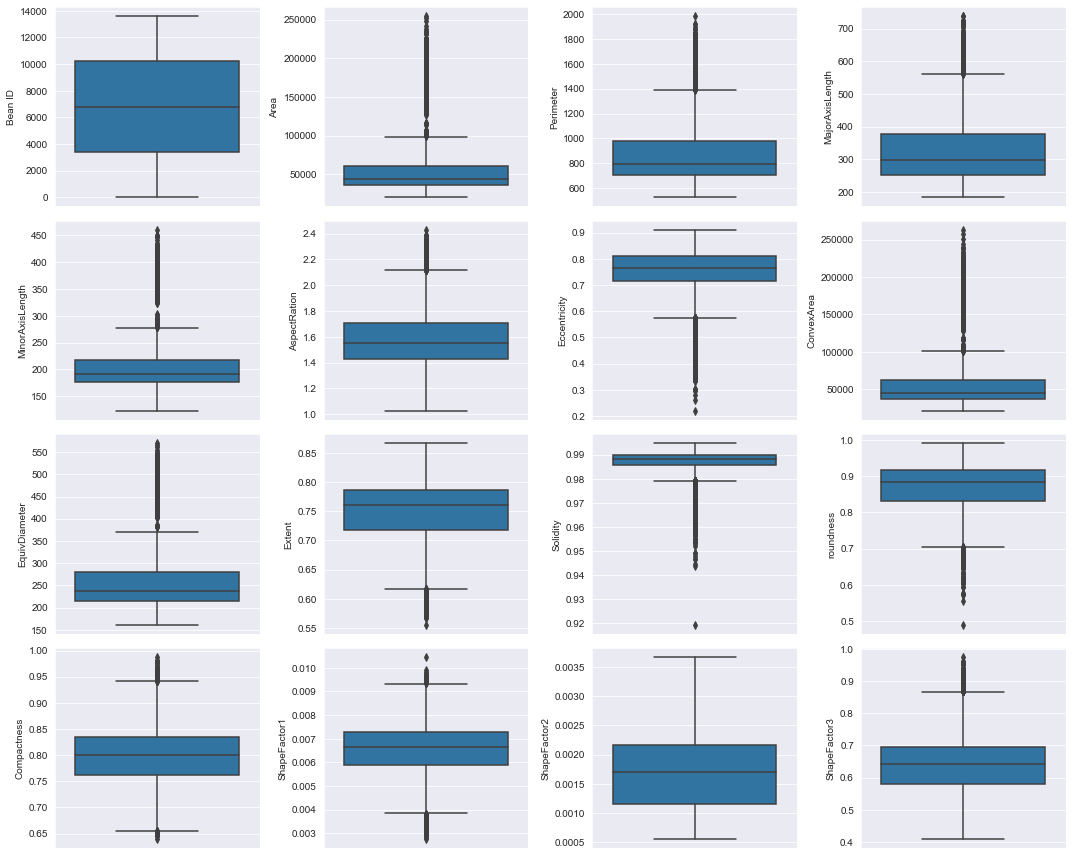

In [51]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot)
plt.tight_layout()

**4- Pearson linear correlation**

<AxesSubplot:>

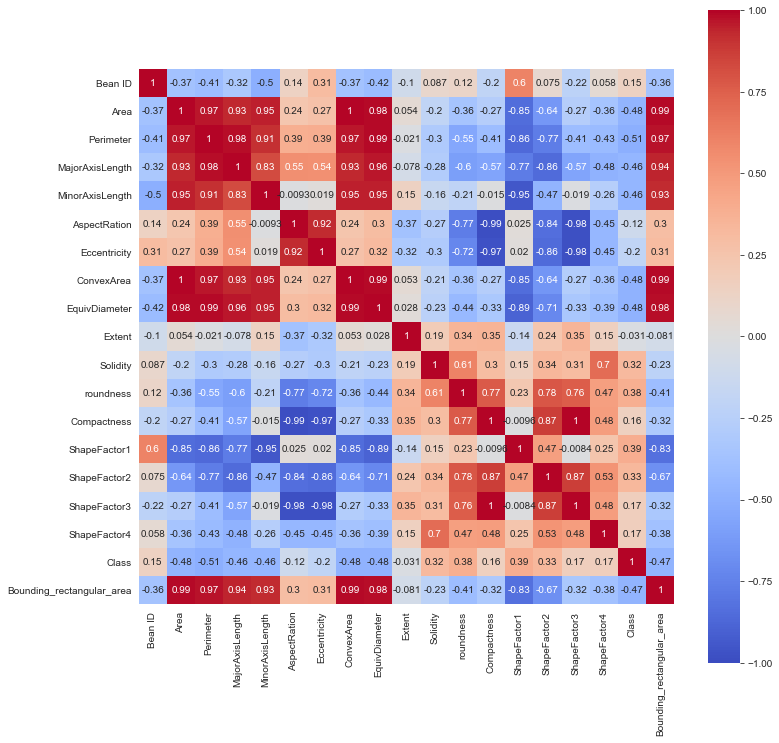

In [52]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

- There are lots of highly correlated features and to examine this multicollinearity more, we will look at the pairwise scatter plots.

**5 - Variables Scatter Pairplots**

## Adding new features

In [53]:
df['Bounding_rectangular_area'] = df['Area']/df['Extent']

## Label Encoding target column 

In [54]:
le = preprocessing.LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [55]:
df['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3], dtype=int64)

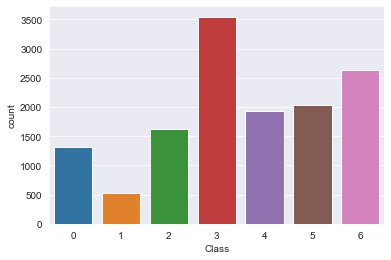

In [56]:
_ = sns.countplot(x='Class', data=df)

## Train Validation split
- We are going to split the data into train and validation sets prior to any normalization or feature scaling, work with the train-splitted set separately and then apply its normalization parameters on the validation and test sets.

In [73]:
df.count()

Bean ID                      13611
Area                         13611
Perimeter                    13611
MajorAxisLength              13611
MinorAxisLength              13611
AspectRation                 13611
Eccentricity                 13611
ConvexArea                   13611
EquivDiameter                13611
Extent                       13611
Solidity                     13611
roundness                    13611
Compactness                  13611
ShapeFactor1                 13611
ShapeFactor2                 13611
ShapeFactor3                 13611
ShapeFactor4                 13611
Class                        13611
Bounding_rectangular_area    13611
dtype: int64

In [74]:
features = df.drop(columns=['Class']).columns
train_df, val_df = train_test_split(df, test_size=0.20, random_state=4200, stratify = df['Class'])

- **Removing Outliers in some features in the training set within certain threshold**

In [75]:
train_df = train_df[train_df['Eccentricity'] >= 0.25]
train_df = train_df[train_df['Solidity'] >= 0.94]
train_df = train_df[train_df['roundness'] >= 0.53]
train_df = train_df[train_df['ShapeFactor4'] >= 0.96]

In [76]:
X_train = train_df[features]
y_train = train_df['Class']

X_val = val_df[features]
y_val = val_df['Class']

## Feature Scaling

In [77]:
cols = ['Area', 'ConvexArea','MajorAxisLength','Perimeter','MinorAxisLength','EquivDiameter','Eccentricity',
                'ShapeFactor2','Extent','roundness','AspectRation','Compactness','ShapeFactor1','ShapeFactor3',
               'ShapeFactor4','Solidity','Bounding_rectangular_area']

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train[cols])
X_train[cols] = pd.DataFrame(X_train_scaled, index=X_train.index)

X_val_scaled = sc.transform(X_val[cols])
X_val[cols] = pd.DataFrame(X_val_scaled, index=X_val.index)

In [78]:
X_train = X_train.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                                'Perimeter','AspectRation'])
X_val = X_val.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                            'Perimeter','AspectRation'])

# Modelling

Train F1_Score:  0.7685942815114462
Val F1_Score:  0.7675358060962174


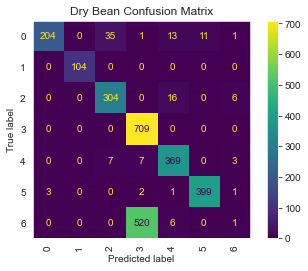

In [79]:
model_mlp= MLPClassifier(random_state=1, max_iter=500, alpha=0.005)

model_mlp.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_mlp.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_mlp.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_mlp, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  1.0
Val F1_Score:  0.9985310319500551


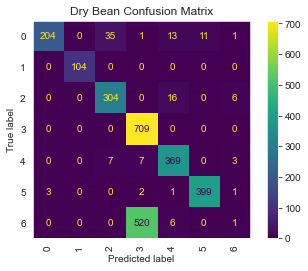

In [80]:
model_xgb= xgb.XGBClassifier(random_state=42,verbosity=0, min_child_weight=2,
                             max_depth=4, learning_rate=0.15, gamma=0.22, colsample_bytree=0.5)

model_xgb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_xgb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_xgb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_mlp, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

0:	learn: 1.4289906	total: 20.3ms	remaining: 12.1s
1:	learn: 1.1536863	total: 41.8ms	remaining: 12.5s
2:	learn: 0.9612675	total: 68.1ms	remaining: 13.6s
3:	learn: 0.8187117	total: 85.2ms	remaining: 12.7s
4:	learn: 0.7074912	total: 108ms	remaining: 12.8s
5:	learn: 0.6178811	total: 135ms	remaining: 13.4s
6:	learn: 0.5437699	total: 152ms	remaining: 12.9s
7:	learn: 0.4786957	total: 175ms	remaining: 12.9s
8:	learn: 0.4255505	total: 203ms	remaining: 13.3s
9:	learn: 0.3780273	total: 221ms	remaining: 13.1s
10:	learn: 0.3355989	total: 248ms	remaining: 13.3s
11:	learn: 0.3008796	total: 276ms	remaining: 13.5s
12:	learn: 0.2703108	total: 295ms	remaining: 13.3s
13:	learn: 0.2429235	total: 317ms	remaining: 13.3s
14:	learn: 0.2188801	total: 342ms	remaining: 13.3s
15:	learn: 0.1971397	total: 359ms	remaining: 13.1s
16:	learn: 0.1784593	total: 382ms	remaining: 13.1s
17:	learn: 0.1618229	total: 409ms	remaining: 13.2s
18:	learn: 0.1459420	total: 428ms	remaining: 13.1s
19:	learn: 0.1323766	total: 454ms	rem

165:	learn: 0.0017234	total: 4.57s	remaining: 11.9s
166:	learn: 0.0017015	total: 4.6s	remaining: 11.9s
167:	learn: 0.0016920	total: 4.61s	remaining: 11.9s
168:	learn: 0.0016848	total: 4.63s	remaining: 11.8s
169:	learn: 0.0016742	total: 4.66s	remaining: 11.8s
170:	learn: 0.0016663	total: 4.68s	remaining: 11.7s
171:	learn: 0.0016551	total: 4.69s	remaining: 11.7s
172:	learn: 0.0016477	total: 4.72s	remaining: 11.7s
173:	learn: 0.0016216	total: 4.74s	remaining: 11.6s
174:	learn: 0.0015936	total: 4.76s	remaining: 11.6s
175:	learn: 0.0015715	total: 4.8s	remaining: 11.6s
176:	learn: 0.0015561	total: 4.81s	remaining: 11.5s
177:	learn: 0.0015477	total: 4.83s	remaining: 11.4s
178:	learn: 0.0015266	total: 4.86s	remaining: 11.4s
179:	learn: 0.0015159	total: 4.88s	remaining: 11.4s
180:	learn: 0.0014999	total: 4.9s	remaining: 11.3s
181:	learn: 0.0014938	total: 4.93s	remaining: 11.3s
182:	learn: 0.0014813	total: 4.95s	remaining: 11.3s
183:	learn: 0.0014675	total: 4.99s	remaining: 11.3s
184:	learn: 0.0

328:	learn: 0.0007380	total: 8.39s	remaining: 6.91s
329:	learn: 0.0007359	total: 8.43s	remaining: 6.89s
330:	learn: 0.0007352	total: 8.45s	remaining: 6.87s
331:	learn: 0.0007336	total: 8.46s	remaining: 6.83s
332:	learn: 0.0007317	total: 8.48s	remaining: 6.8s
333:	learn: 0.0007257	total: 8.51s	remaining: 6.78s
334:	learn: 0.0007238	total: 8.53s	remaining: 6.75s
335:	learn: 0.0007221	total: 8.54s	remaining: 6.71s
336:	learn: 0.0007205	total: 8.58s	remaining: 6.69s
337:	learn: 0.0007194	total: 8.6s	remaining: 6.66s
338:	learn: 0.0007168	total: 8.61s	remaining: 6.63s
339:	learn: 0.0007138	total: 8.65s	remaining: 6.61s
340:	learn: 0.0007118	total: 8.66s	remaining: 6.58s
341:	learn: 0.0007093	total: 8.68s	remaining: 6.55s
342:	learn: 0.0007043	total: 8.71s	remaining: 6.53s
343:	learn: 0.0007027	total: 8.73s	remaining: 6.5s
344:	learn: 0.0006978	total: 8.75s	remaining: 6.46s
345:	learn: 0.0006965	total: 8.78s	remaining: 6.45s
346:	learn: 0.0006946	total: 8.8s	remaining: 6.42s
347:	learn: 0.00

491:	learn: 0.0004622	total: 12.6s	remaining: 2.77s
492:	learn: 0.0004614	total: 12.7s	remaining: 2.75s
493:	learn: 0.0004606	total: 12.7s	remaining: 2.72s
494:	learn: 0.0004586	total: 12.7s	remaining: 2.69s
495:	learn: 0.0004569	total: 12.7s	remaining: 2.67s
496:	learn: 0.0004562	total: 12.8s	remaining: 2.64s
497:	learn: 0.0004556	total: 12.8s	remaining: 2.62s
498:	learn: 0.0004550	total: 12.8s	remaining: 2.59s
499:	learn: 0.0004543	total: 12.8s	remaining: 2.56s
500:	learn: 0.0004531	total: 12.8s	remaining: 2.54s
501:	learn: 0.0004525	total: 12.9s	remaining: 2.51s
502:	learn: 0.0004519	total: 12.9s	remaining: 2.49s
503:	learn: 0.0004502	total: 12.9s	remaining: 2.46s
504:	learn: 0.0004497	total: 12.9s	remaining: 2.43s
505:	learn: 0.0004478	total: 13s	remaining: 2.41s
506:	learn: 0.0004459	total: 13s	remaining: 2.38s
507:	learn: 0.0004442	total: 13s	remaining: 2.35s
508:	learn: 0.0004430	total: 13s	remaining: 2.33s
509:	learn: 0.0004423	total: 13s	remaining: 2.3s
510:	learn: 0.0004417	t

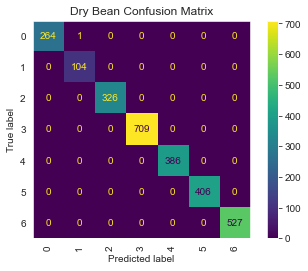

In [81]:
model_cb= cb.CatBoostClassifier(random_state=42,learning_rate=0.1, l2_leaf_reg=4, iterations=600, depth= 6)

model_cb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_cb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_cb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_cb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  1.0
Val F1_Score:  0.9981637899375688


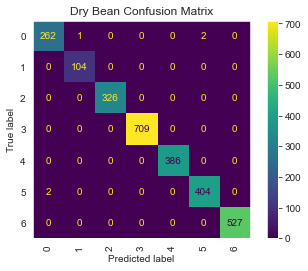

In [82]:
model_lgb = lgb.LGBMClassifier(random_state=42,silent=True,subsample=0.8, reg_lambda=0.1,reg_alpha=1, num_leaves=5, 
                             n_estimators=100, min_child_samples=5, max_depth=5, learning_rate=0.12, 
                             colsample_bytree=0.5, boosting_type='goss', metric='multi_error', num_class=7)

model_lgb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_lgb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_lgb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  0.9993564401949067
Val F1_Score:  0.9981637899375688


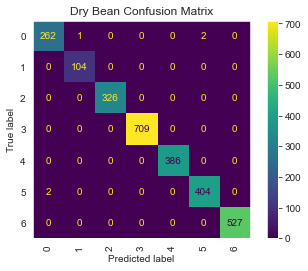

In [83]:
model_svc = SVC(probability=True, kernel='rbf', C=25)

model_svc.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_svc.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_svc.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  0.9993564401949067
Val F1_Score:  0.9981637899375688


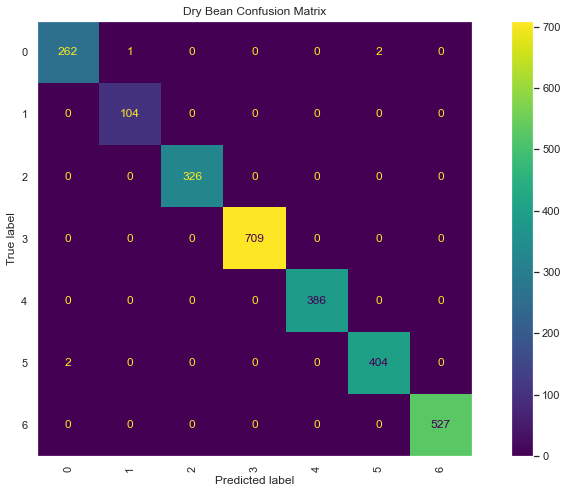

In [118]:
from sklearn.neighbors import KNeighborsClassifier
model_KN = KNeighborsClassifier()

model_KN.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_svc.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_svc.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show() 

Train F1_Score:  0.9993564401949067
Val F1_Score:  0.9981637899375688


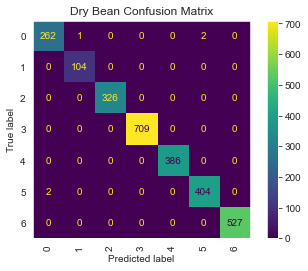

In [94]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()

model_DT.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_svc.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_svc.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show() 

Train F1_Score:  0.9993564401949067
Val F1_Score:  0.9981637899375688


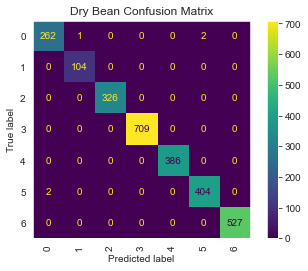

In [87]:
model_RF = RandomForestClassifier()

model_RF.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_svc.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_svc.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  0.9993564401949067
Val F1_Score:  0.9981637899375688


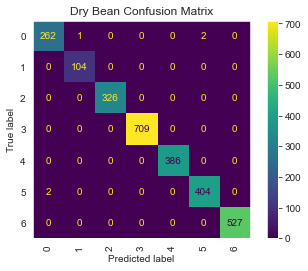

In [88]:
model_LR = LogisticRegression(random_state=1, solver = 'liblinear',multi_class = 'auto')

model_LR.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_svc.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_svc.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  0.9993564401949067
Val F1_Score:  0.9981637899375688


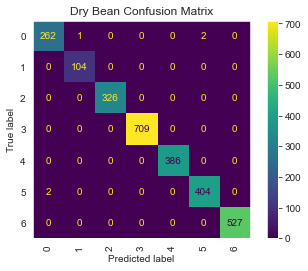

In [89]:
model_GB = GradientBoostingClassifier()

model_GB.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_svc.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_svc.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  0.9993564401949067
Val F1_Score:  0.9981637899375688


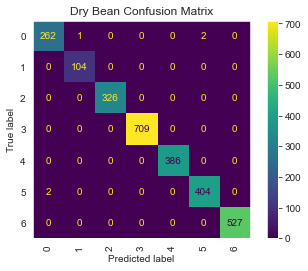

In [92]:
from sklearn.naive_bayes import GaussianNB

model_Ga = GaussianNB()

model_Ga.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_svc.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_svc.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

0:	learn: 1.4289906	total: 18.7ms	remaining: 11.2s
1:	learn: 1.1536863	total: 39.2ms	remaining: 11.7s
2:	learn: 0.9612675	total: 68.2ms	remaining: 13.6s
3:	learn: 0.8187117	total: 85.9ms	remaining: 12.8s
4:	learn: 0.7074912	total: 105ms	remaining: 12.5s
5:	learn: 0.6178811	total: 136ms	remaining: 13.4s
6:	learn: 0.5437699	total: 152ms	remaining: 12.9s
7:	learn: 0.4786957	total: 166ms	remaining: 12.3s
8:	learn: 0.4255505	total: 201ms	remaining: 13.2s
9:	learn: 0.3780273	total: 222ms	remaining: 13.1s
10:	learn: 0.3355989	total: 238ms	remaining: 12.8s
11:	learn: 0.3008796	total: 273ms	remaining: 13.4s
12:	learn: 0.2703108	total: 290ms	remaining: 13.1s
13:	learn: 0.2429235	total: 304ms	remaining: 12.7s
14:	learn: 0.2188801	total: 336ms	remaining: 13.1s
15:	learn: 0.1971397	total: 352ms	remaining: 12.8s
16:	learn: 0.1784593	total: 366ms	remaining: 12.6s
17:	learn: 0.1618229	total: 398ms	remaining: 12.9s
18:	learn: 0.1459420	total: 414ms	remaining: 12.7s
19:	learn: 0.1323766	total: 437ms	rem

170:	learn: 0.0016663	total: 4.06s	remaining: 10.2s
171:	learn: 0.0016551	total: 4.09s	remaining: 10.2s
172:	learn: 0.0016477	total: 4.11s	remaining: 10.2s
173:	learn: 0.0016216	total: 4.13s	remaining: 10.1s
174:	learn: 0.0015936	total: 4.15s	remaining: 10.1s
175:	learn: 0.0015715	total: 4.18s	remaining: 10.1s
176:	learn: 0.0015561	total: 4.2s	remaining: 10s
177:	learn: 0.0015477	total: 4.21s	remaining: 9.98s
178:	learn: 0.0015266	total: 4.24s	remaining: 9.98s
179:	learn: 0.0015159	total: 4.26s	remaining: 9.95s
180:	learn: 0.0014999	total: 4.28s	remaining: 9.91s
181:	learn: 0.0014938	total: 4.32s	remaining: 9.92s
182:	learn: 0.0014813	total: 4.33s	remaining: 9.88s
183:	learn: 0.0014675	total: 4.35s	remaining: 9.83s
184:	learn: 0.0014592	total: 4.38s	remaining: 9.84s
185:	learn: 0.0014502	total: 4.4s	remaining: 9.8s
186:	learn: 0.0014344	total: 4.42s	remaining: 9.77s
187:	learn: 0.0014304	total: 4.45s	remaining: 9.75s
188:	learn: 0.0014210	total: 4.47s	remaining: 9.71s
189:	learn: 0.001

330:	learn: 0.0007352	total: 7.82s	remaining: 6.36s
331:	learn: 0.0007336	total: 7.85s	remaining: 6.33s
332:	learn: 0.0007317	total: 7.86s	remaining: 6.3s
333:	learn: 0.0007257	total: 7.88s	remaining: 6.28s
334:	learn: 0.0007238	total: 7.91s	remaining: 6.26s
335:	learn: 0.0007221	total: 7.93s	remaining: 6.23s
336:	learn: 0.0007205	total: 7.95s	remaining: 6.21s
337:	learn: 0.0007194	total: 7.98s	remaining: 6.19s
338:	learn: 0.0007168	total: 8s	remaining: 6.16s
339:	learn: 0.0007138	total: 8.02s	remaining: 6.13s
340:	learn: 0.0007118	total: 8.05s	remaining: 6.12s
341:	learn: 0.0007093	total: 8.07s	remaining: 6.09s
342:	learn: 0.0007043	total: 8.11s	remaining: 6.08s
343:	learn: 0.0007027	total: 8.13s	remaining: 6.05s
344:	learn: 0.0006978	total: 8.15s	remaining: 6.02s
345:	learn: 0.0006965	total: 8.18s	remaining: 6.01s
346:	learn: 0.0006946	total: 8.2s	remaining: 5.98s
347:	learn: 0.0006923	total: 8.22s	remaining: 5.96s
348:	learn: 0.0006915	total: 8.26s	remaining: 5.94s
349:	learn: 0.000

494:	learn: 0.0004586	total: 11.8s	remaining: 2.51s
495:	learn: 0.0004569	total: 11.8s	remaining: 2.48s
496:	learn: 0.0004562	total: 11.9s	remaining: 2.46s
497:	learn: 0.0004556	total: 11.9s	remaining: 2.44s
498:	learn: 0.0004550	total: 11.9s	remaining: 2.41s
499:	learn: 0.0004543	total: 11.9s	remaining: 2.38s
500:	learn: 0.0004531	total: 12s	remaining: 2.36s
501:	learn: 0.0004525	total: 12s	remaining: 2.34s
502:	learn: 0.0004519	total: 12s	remaining: 2.31s
503:	learn: 0.0004502	total: 12s	remaining: 2.29s
504:	learn: 0.0004497	total: 12s	remaining: 2.27s
505:	learn: 0.0004478	total: 12.1s	remaining: 2.24s
506:	learn: 0.0004459	total: 12.1s	remaining: 2.22s
507:	learn: 0.0004442	total: 12.1s	remaining: 2.19s
508:	learn: 0.0004430	total: 12.1s	remaining: 2.17s
509:	learn: 0.0004423	total: 12.2s	remaining: 2.14s
510:	learn: 0.0004417	total: 12.2s	remaining: 2.12s
511:	learn: 0.0004398	total: 12.2s	remaining: 2.1s
512:	learn: 0.0004389	total: 12.2s	remaining: 2.07s
513:	learn: 0.0004382	t

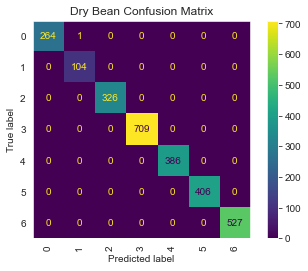

In [102]:
voting_model = VotingClassifier(estimators=[('xgb', model_xgb), ('lgb', model_lgb),('mlp', model_mlp),
                                            ('cb', model_cb),('KN',model_KN),('dt',model_DT),('RF',model_RF),('lr',model_LR),('GB',model_GB),('ga',model_Ga)], voting='soft')

voting_model.fit(X_train, y_train)

print("F1_Score: ", metrics.f1_score(y_val, voting_model.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(voting_model, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()

In [120]:
models=[]
f1_score=[]  

for clf in (model_svc, model_lgb, model_xgb, model_mlp, model_cb,model_KN,model_DT,model_RF,model_LR,model_Ga,model_GB,voting_model):
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, metrics.f1_score(y_val, y_pred, average='micro'))

SVC 0.9981637899375688
LGBMClassifier 0.9981637899375688
XGBClassifier 0.9985310319500551
MLPClassifier 0.7675358060962174
CatBoostClassifier 0.9996327579875137
KNeighborsClassifier 0.9996327579875137
DecisionTreeClassifier 0.9988982739625413
RandomForestClassifier 0.9996327579875137
LogisticRegression 0.956665442526625
GaussianNB 0.9860448035255234
GradientBoostingClassifier 0.9992655159750276
VotingClassifier 0.9996327579875137


# Test

In [105]:
# test_df = pd.read_csv('dataset/test_dry.csv')
# X_test = test_df.drop(columns=['ID'])

# X_test['Bounding_rectangular_area'] = X_test['Area']/X_test['Extent']


# X_test_scaled = sc.transform(X_test[cols])
# X_test[cols] = pd.DataFrame(X_test_scaled, index=X_test.index)


# X_test = X_test.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
#                               'Perimeter','AspectRation'])

# y_test_pred = voting_model.predict(X_test)

In [ ]:
test_df['y'] = le.inverse_transform(y_test_pred)
#test_df[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)

In [122]:
!pip install xelatex

ERROR: Could not find a version that satisfies the requirement xelatex
ERROR: No matching distribution found for xelatex
